In [2]:
%cd /Users/femibyte/devel/sandbox/Learning/Kaggle/Titanic


/Users/femibyte/devel/sandbox/Learning/Kaggle/Titanic


In [3]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import patsy as pt


In [4]:
# For .read_csv, always use header=0 when you know row 0 is the header row
train_df = pd.read_csv('csv/train.csv', header=0)
test_df = pd.read_csv('csv/test.csv', header=0) 

In [5]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [192]:
test_df.head(3)[['PassengerId','Pclass','Sex','Fare']]

,PassengerId,Pclass,Sex,Fare
0,892,3,male,7.8292
1,893,3,female,7.0000
2,894,2,male,9.6875


In [4]:
train_df['PassengerId']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
...
876    877
877    878
878    879
879    880
880    881
881    882
882    883
883    884
884    885
885    886
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [3]:
%matplotlib inline
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()


NameError: name 'cross_val_score' is not defined

In [7]:
def rand_jitter(arr,scale):
    stdev=scale*(max(arr)-min(arr))
    return arr+np.random.randn(len(arr))*stdev

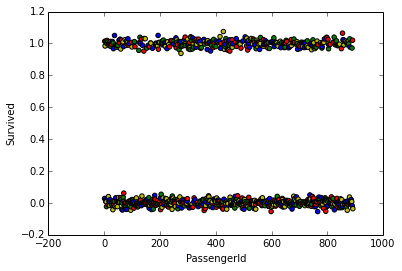

In [37]:
#fig, ax = plt.subplots()
#im = ax.scatter(train_df['PassengerId'], train_df['Survived'])
#fig.colorbar(im);
#plt.scatter(train_df['PassengerId'], train_df['Survived'])
plt.scatter(train_df['PassengerId'], 
            rand_jitter(train_df['Survived'],.02),c=['b','r','y','g'])
plt.xlabel('PassengerId')
plt.ylabel('Survived')

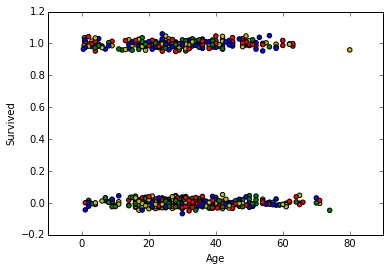

In [7]:
plt.scatter(train_df['Age'], 
            rand_jitter(train_df['Survived'],.02),c=['b','r','y','g'])
plt.xlabel('Age')
plt.ylabel('Survived')

In [101]:
import seaborn as sns
titanic=sns.load_dataset('titanic')

In [6]:
sc

''

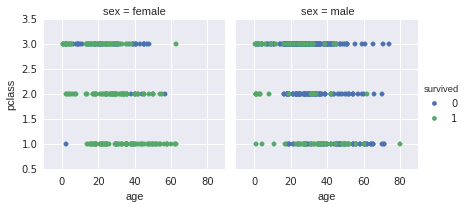

In [103]:
g=sns.FacetGrid(titanic,col='sex',hue='survived')
g.map(plt.scatter,'age','pclass')
g.add_legend();

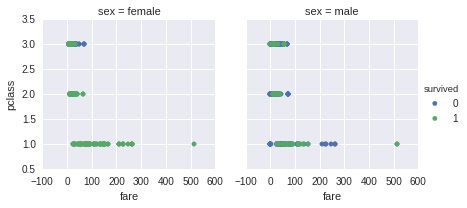

In [7]:
g=sns.FacetGrid(titanic,col='sex',hue='survived')
g.map(plt.scatter,'fare','pclass')
g.add_legend();

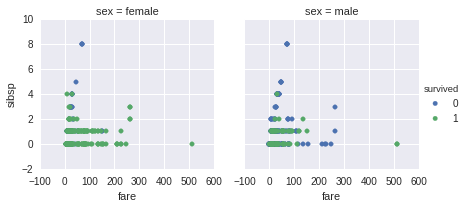

In [8]:
g=sns.FacetGrid(titanic,col='sex',hue='survived')
g.map(plt.scatter,'fare','sibsp')
g.add_legend();

In [81]:
train_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'], dtype='object')

In [27]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
sorted(train_df['SibSp'].unique())

[0, 1, 2, 3, 4, 5, 8]

In [33]:
sorted(test_df['SibSp'].unique())

[0, 1, 2, 3, 4, 5, 8]

In [3]:
from missingmap import missmap

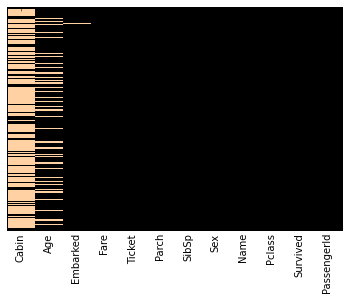

In [7]:
col_map={True: '#ffd1a3', False: 'k'}
x=missmap(train_df, colors=col_map)

In [19]:
train_df['Cabin'].count().sum()

204

In [20]:
len(train_df['Cabin'])

891

In [21]:
train_df['Age'].count().sum()

714

In [8]:
def perc_missing(x):
    100*(1-x.count().sum()/(1.0*len(x)))
    

In [9]:
train_df.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
train_df.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
missing_perc=train_df.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x)))).order(ascending=False)


In [12]:
type(missing_perc)

pandas.core.series.Series

In [13]:
print(missing_perc)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64


In [14]:
train_df.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
missing_perc=train_df.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))

In [16]:
sorted_missing_perc=missing_perc.order(ascending=False)
sorted_missing_perc

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [17]:
perc=lambda x: 100*pd.Series.value_counts(x)/len(x)

In [18]:
train_df[['Pclass']].apply(perc)

,Pclass
3,55.106622
1,24.242424
2,20.650954


In [19]:
train_df[['Sex']].apply(perc)

,Sex
male,64.758698
female,35.241302


In [20]:
for col in ['Pclass','Sex','Embarked']:
    print train_df[[col]].apply(pd.Series.value_counts)
    print train_df[[col]].apply(perc)
    print "\n\n"

   Pclass
3     491
1     216
2     184
      Pclass
3  55.106622
1  24.242424
2  20.650954



        Sex
male    577
female  314
              Sex
male    64.758698
female  35.241302



   Embarked
S       644
C       168
Q        77
    Embarked
S  72.278339
C  18.855219
Q   8.641975





In [23]:
train_df['Pclass'].unique()

array([3, 1, 2])

In [24]:
train_df['Pclass'].groupby(level=0).value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.SeriesGroupBy object at 0x7efff06ddf90>>

In [25]:
train_df['Pclass'].groupby(level=0).value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.SeriesGroupBy object at 0x7efff0236950>>

In [26]:
train_df[['Survived']].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [21]:
import pprint as pp
for col in ['Pclass','Sex','Embarked','Survived','Parch']:
    new_df=pd.DataFrame()
    new_df[['Counts']]=train_df[[col]].apply(pd.Series.value_counts)
    new_df[['Perc']]=train_df[[col]].apply(perc)
    print col
    print new_df
    print "\n\n"

Pclass
   Counts       Perc
3     491  55.106622
1     216  24.242424
2     184  20.650954



Sex
        Counts       Perc
male       577  64.758698
female     314  35.241302



Embarked
   Counts       Perc
S     644  72.278339
C     168  18.855219
Q      77   8.641975



Survived
   Counts       Perc
0     549  61.616162
1     342  38.383838



Parch
   Counts       Perc
0     678  76.094276
1     118  13.243547
2      80   8.978676
5       5   0.561167
3       5   0.561167
4       4   0.448934
6       1   0.112233





In [22]:
import pprint as pp
from IPython.display import display
for col in ['Pclass','Sex','Embarked','Survived','Parch','SibSp']:
    new_df=pd.DataFrame()
    new_df[['Count']]=train_df[[col]].apply(pd.Series.value_counts)
    new_df[['Perc']]=train_df[[col]].apply(perc)
    display(col)
    display(new_df.sort())

'Pclass'

,Count,Perc
1,216,24.242424
2,184,20.650954
3,491,55.106622


'Sex'

,Count,Perc
female,314,35.241302
male,577,64.758698


'Embarked'

,Count,Perc
C,168,18.855219
Q,77,8.641975
S,644,72.278339


'Survived'

,Count,Perc
0,549,61.616162
1,342,38.383838


'Parch'

,Count,Perc
0,678,76.094276
1,118,13.243547
2,80,8.978676
3,5,0.561167
4,4,0.448934
5,5,0.561167
6,1,0.112233


'SibSp'

,Count,Perc
0,608,68.237935
1,209,23.456790
2,28,3.142536
3,16,1.795735
4,18,2.020202
5,5,0.561167
8,7,0.785634


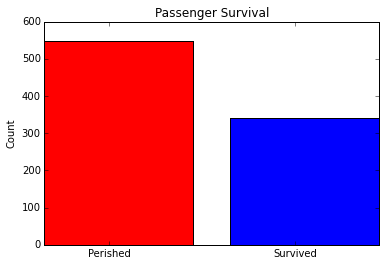

In [6]:
bar_width=0.35
categories=['Perished','Survived']
num_bars=len(categories)
index=np.arange(num_bars)
perished=plt.bar(0,len(train_df[train_df['Survived']==0]), label='Perished', color='r')
survived=plt.bar(1,len(train_df[train_df['Survived']==1]), label='Survived', color='b')
plt.title('Passenger Survival')
plt.ylabel('Count')
plt.xticks(index+bar_width,categories)
plt.show()
                            

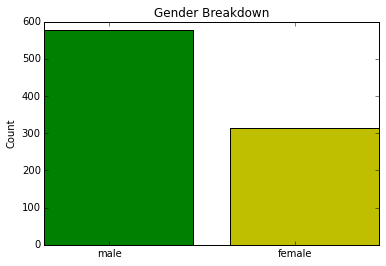

In [7]:
bar_width=0.35
categories=['male','female']
num_bars=len(categories)
index=np.arange(num_bars)
male=plt.bar(0,len(train_df[train_df['Sex']=='male']), label='Male', color='g')
female=plt.bar(1,len(train_df[train_df['Sex']=='female']), label='Female', color='y')
plt.title('Gender Breakdown')
plt.ylabel('Count')
plt.xticks(index+bar_width,categories)
plt.show()

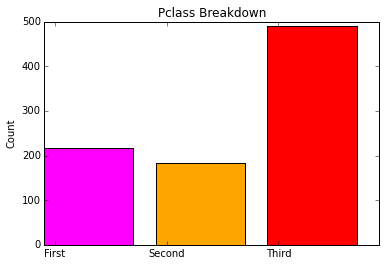

In [8]:
bar_width=0.1
categories=('First','Second', 'Third')
num_bars=len(categories)
index=np.arange(num_bars)
first=plt.bar(0,len(train_df[train_df['Pclass']==1]), label='First', color='magenta')
second=plt.bar(1,len(train_df[train_df['Pclass']==2]), label='Second', color='orange')
third=plt.bar(2,len(train_df[train_df['Pclass']==3]), label='Third', color='red')
plt.title('Pclass Breakdown')
plt.ylabel('Count')
plt.xticks(index+bar_width,categories)
plt.show()

In [81]:
len(train_df[train_df['Pclass']==3])

491

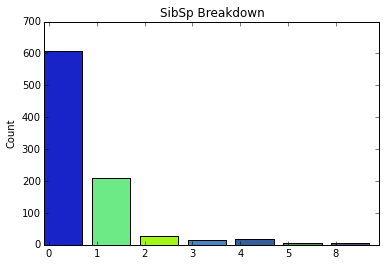

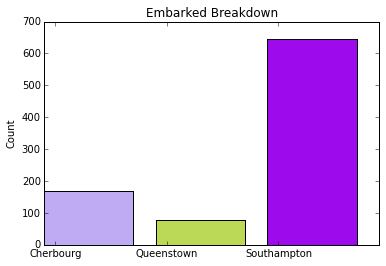

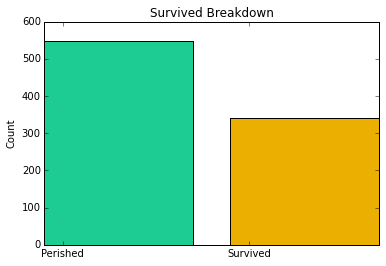

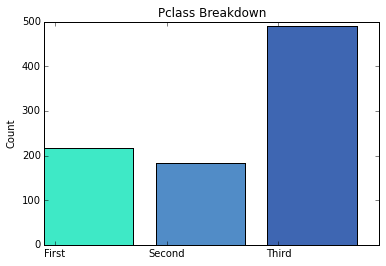

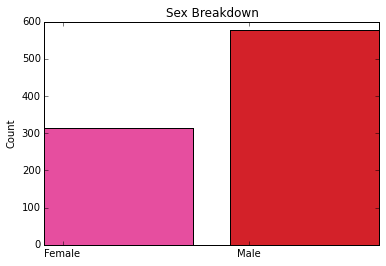

In [9]:
import random
bar_width=0.1
categories_map={'Pclass':{'First':1,'Second':2, 'Third':3},
                'Sex':{'Female':'female','Male':'male'},
                'Survived':{'Perished':0,'Survived':1},
                'Embarked':{'Cherbourg':'C','Queenstown':'Q','Southampton':'S'},
                'SibSp': { str(x):x for x in [0,1,2,3,4,5,8]}            
                            
                        
                }
colors=['red','green','blue','yellow','magenta','orange']

for category_key,category_items in categories_map.iteritems():
    num_bars=len(category_items)
    index=np.arange(num_bars)
    idx=0
    for cat_name,cat_val in sorted(category_items.iteritems()):
        plt.bar(idx,len(train_df[train_df[category_key]==cat_val]), label=cat_name,
                color=np.random.rand(3,1))
        idx+=1
    plt.title('%s Breakdown' % category_key)
    plt.ylabel('Count')
    plt.xticks(index+bar_width,sorted(category_items.keys()))
    plt.show()
#first=plt.bar(0,len(train_df[train_df['Pclass']==1]), label='First', color='magenta')
#second=plt.bar(1,len(train_df[train_df['Pclass']==2]), label='Second', color='orange')
#third=plt.bar(2,len(train_df[train_df['Pclass']==3]), label='Third', color='red')


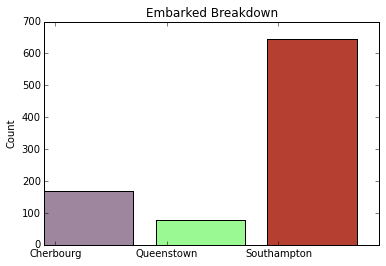

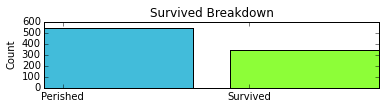

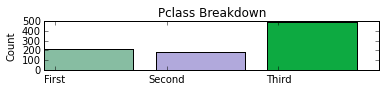

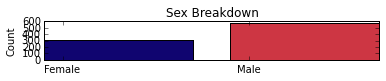

In [10]:
import random
bar_width=0.1
categories_map={'Pclass':{'First':1,'Second':2, 'Third':3},
                'Sex':{'Female':'female','Male':'male'},
                'Survived':{'Perished':0,'Survived':1},
                'Embarked':{'Cherbourg':'C','Queenstown':'Q','Southampton':'S'}
                }
colors=['red','green','blue','yellow','magenta','orange']
subplots=[111,311,411,511]
cIdx=0
for category_key,category_items in categories_map.iteritems():
    num_bars=len(category_items)
    index=np.arange(num_bars)
    idx=0
    ax=plt.subplot(subplots[cIdx])
    for cat_name,cat_val in sorted(category_items.iteritems()):
        ax.bar(idx,len(train_df[train_df[category_key]==cat_val]), label=cat_name,
                color=np.random.rand(3,1))
        idx+=1
    cIdx+=1
    plt.title('%s Breakdown' % category_key)
    plt.ylabel('Count')
    plt.xticks(index+bar_width,sorted(category_items.keys()))
    plt.show()

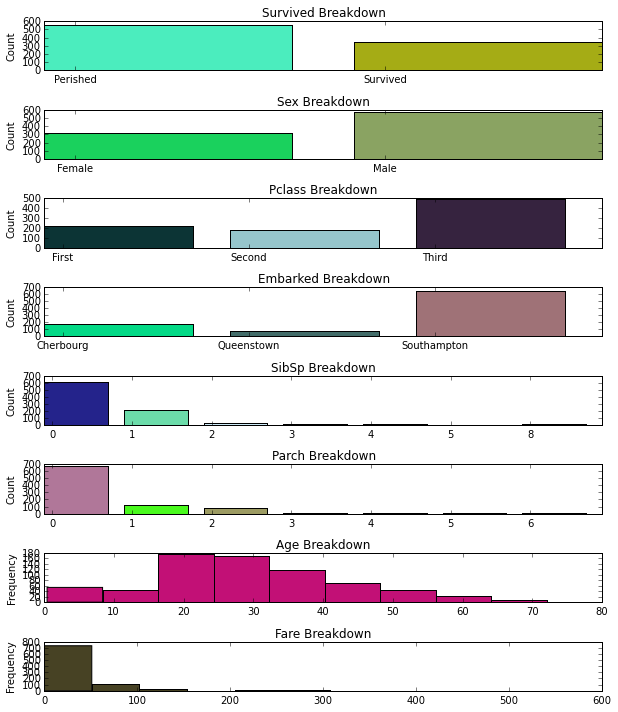

In [11]:
import random
bar_width=0.1
categories_map={'Pclass':{'First':1,'Second':2, 'Third':3},
                'Sex':{'Female':'female','Male':'male'},
                'Survived':{'Perished':0,'Survived':1},
                'Embarked':{'Cherbourg':'C','Queenstown':'Q','Southampton':'S'},
                'SibSp': { str(x):x for x in [0,1,2,3,4,5,8]},
                'Parch': {str(x):x for x in range(7)}
                }
colors=['red','green','blue','yellow','magenta','orange']
subplots=[111,211,311,411,511,611,711,811]
cIdx=0
fig,ax=plt.subplots(len(subplots),figsize=(10,12))

keyorder = ['Survived','Sex','Pclass','Embarked','SibSp','Parch']

for category_key,category_items in sorted(categories_map.iteritems(),
                                          key=lambda i:keyorder.index(i[0])):
    num_bars=len(category_items)
    index=np.arange(num_bars)
    idx=0
    for cat_name,cat_val in sorted(category_items.iteritems()):
        ax[cIdx].bar(idx,len(train_df[train_df[category_key]==cat_val]), label=cat_name,
                color=np.random.rand(3,1))
        idx+=1
    ax[cIdx].set_title('%s Breakdown' % category_key)
    xlabels=sorted(category_items.keys()) 
    ax[cIdx].set_xticks(index+bar_width)
    ax[cIdx].set_xticklabels(xlabels)
    ax[cIdx].set_ylabel('Count')
    cIdx +=1 
fig.subplots_adjust(hspace=0.8)
for hcat in ['Age','Fare']:
    ax[cIdx].hist(train_df[hcat].dropna(),color=np.random.rand(3,1))
    ax[cIdx].set_title('%s Breakdown' % hcat)
    #ax[cIdx].set_xlabel(hcat)
    ax[cIdx].set_ylabel('Frequency')
    cIdx +=1

fig.subplots_adjust(hspace=0.8)
plt.show()

In [115]:
train_df['Age'].dropna()

0     22
1     38
2     26
3     35
4     35
6     54
7      2
8     27
9     14
10     4
11    58
12    20
13    39
14    14
15    55
...
874    28
875    15
876    20
877    19
879    56
880    25
881    33
882    22
883    28
884    25
885    39
886    27
887    19
889    26
890    32
Name: Age, Length: 714, dtype: float64

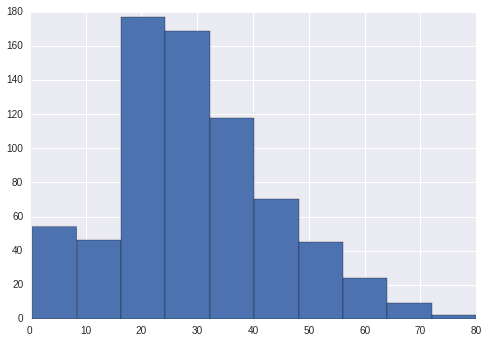

In [117]:
plt.hist(train_df['Age'].dropna())
plt.show()

In [40]:
type(train_df['Survived']==1)
#type(train_df['Sex']=='male')

pandas.core.series.Series

In [13]:
from collections import OrderedDict
num_passengers=len(train_df)
num_men=len(train_df[train_df['Sex']=='male'])
men_survived=train_df[(train_df['Survived']==1 ) & (train_df['Sex']=='male')]
num_men_survived=len(men_survived)
num_men_perished=num_men-num_men_survived
num_women=num_passengers-num_men
women_survived=train_df[(train_df['Survived']==1) & (train_df['Sex']=='female')]
num_women_survived=len(women_survived)
num_women_perished=num_women-num_women_survived
gender_survival_dict=OrderedDict()
gender_survival_dict['Survived']={'Men':num_men_survived,'Women':num_women_survived}
gender_survival_dict['Perished']={'Men':num_men_perished,'Women':num_women_perished}
gender_survival_dict['Survival Rate']= {'Men' : round(100.0*num_men_survived/num_men,2),
               'Women':round(100.0*num_women_survived/num_women,2)}

pd.DataFrame(gender_survival_dict)


,Survived,Perished,Survival Rate
Men,109,468,18.89
Women,233,81,74.20


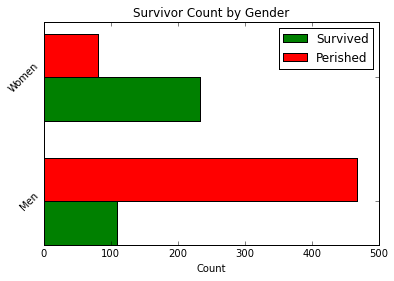

Rectangle(0,0;109x0.35)
(<matplotlib.patches.Rectangle object at 0x7fe5a5d2bc50>, <matplotlib.patches.Rectangle object at 0x7fe5a5d382d0>)
Rectangle(0,0.35;468x0.35)
(<matplotlib.patches.Rectangle object at 0x7fe5a5d38950>, <matplotlib.patches.Rectangle object at 0x7fe5a5d38e90>)


In [16]:
#code to display survival by gender
fig = plt.figure()
ax = fig.add_subplot(111)
perished_data=[num_men_perished, num_women_perished]
survived_data=[num_men_survived, num_women_survived]
N=2
ind = np.arange(N)                # the x locations for the groups
width = 0.35     

survived_rects = ax.barh(ind, survived_data, width,color='green')
perished_rects = ax.barh(ind+width, perished_data, width,color='red')

ax.set_xlabel('Count')
ax.set_title('Survivor Count by Gender')
yTickMarks = ['Men','Women']
ax.set_yticks(ind+width)
ytickNames = ax.set_yticklabels(yTickMarks)
plt.setp(ytickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (survived_rects[0], perished_rects[0]), ('Survived', 'Perished') )

plt.show()
print survived_rects[0]
print survived_rects[:5]
print perished_rects[0]
print perished_rects[:5]


In [86]:
from collections import OrderedDict
num_passengers=len(train_df)
num_class1=len(train_df[train_df['Pclass']==1])
class1_survived=train_df[(train_df['Survived']==1 ) & (train_df['Pclass']==1)]
num_class1_survived=len(class1_survived)
num_class1_perished=num_class1-num_class1_survived
num_class2=len(train_df[train_df['Pclass']==2])
class2_survived=train_df[(train_df['Survived']==1) & (train_df['Pclass']==2)]
num_class2_survived=len(class2_survived)
num_class2_perished=num_class2-num_class2_survived
num_class3=num_passengers-num_class1-num_class2
class3_survived=train_df[(train_df['Survived']==1 ) & (train_df['Pclass']==3)]
num_class3_survived=len(class3_survived)
num_class3_perished=num_class3-num_class3_survived
pclass_survival_dict=OrderedDict()
pclass_survival_dict['Survived']={'1st Class':num_class1_survived,
                                  '2nd Class':num_class2_survived,
                                  '3rd Class':num_class3_survived}
pclass_survival_dict['Perished']={'1st Class':num_class1_perished,
                                  '2nd Class':num_class2_perished,
                                  '3rd Class':num_class3_perished}
pclass_survival_dict['Survival Rate']= {'1st Class' : round(100.0*num_class1_survived/num_class1,2),
               '2nd Class':round(100.0*num_class2_survived/num_class2,2),
               '3rd Class':round(100.0*num_class3_survived/num_class3,2),}

pd.DataFrame(pclass_survival_dict)


,Survived,Perished,Survival Rate
1st Class,136,80,62.96
2nd Class,87,97,47.28
3rd Class,119,372,24.24


NameError: name 'num_class1_perished' is not defined

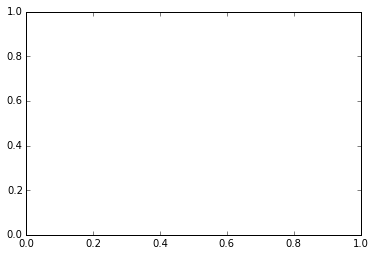

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
perished_data=[num_class1_perished, num_class2_perished, num_class3_perished]
survived_data=[num_class1_survived, num_class2_survived, num_class3_survived]
N=3
ind = np.arange(N)                # the x locations for the groups
width = 0.35     

survived_rects = ax.barh(ind, survived_data, width,color='blue')
perished_rects = ax.barh(ind+width, perished_data, width,color='red')

ax.set_xlabel('Count')
ax.set_title('Survivor Count by Passenger class')
yTickMarks = ['1st Class','2nd Class', '3rd Class']
ax.set_yticks(ind+width)
ytickNames = ax.set_yticklabels(yTickMarks)
plt.setp(ytickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (survived_rects[0], perished_rects[0]), ('Survived', 'Perished'),
          #bbox_to_anchor=(1.2,0.9),
          loc=10 )
plt.show()

In [108]:
type(survival_counts)

pandas.core.frame.DataFrame

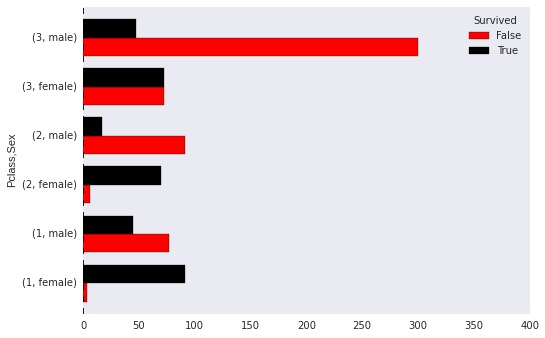

In [129]:
survival_counts=pd.crosstab([train_df.Pclass,train_df.Sex],train_df.Survived.astype(bool))
survival_counts.plot(kind='barh',width=0.75,color=['red','black'],grid=False,xlim=(0,400))

In [131]:
?pd.DataFrame.plot

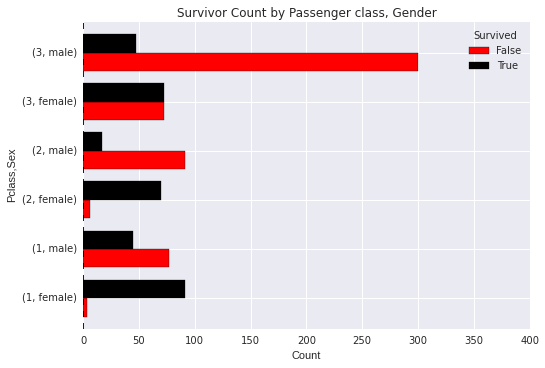

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111)
width=0.35
N=6
ind=np.arange(N)
ax.set_xlabel('Count')
ax.set_title('Survivor Count by Passenger class, Gender')
yTickMarks = ['1st, Female','1st, Male','2nd, Female','2nd, Male','3rd, Female','3rd, Male']
ax.set_yticks(ind+width)
ytickNames = ax.set_yticklabels(yTickMarks)
survival_counts=pd.crosstab([train_df.Pclass,train_df.Sex],train_df.Survived.astype(bool))
survival_counts.plot(kind='barh',ax=ax,width=0.75,color=['red','black'],
                     #yticks=ytickNames,
                     #grid=False,
                     xlim=(0,400))
#ax.barh(survival_counts,color=['red','black'],width=0.75,grid=False,xlim=(0,400))
#ax.barh(ind, survival_counts, width,color=['red','black'])
#ax.barh(ind+width, survival_counts, width,color=['red','black'])

In [126]:
survival_counts

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

In [141]:
survival_counts.index

MultiIndex(levels=[[1, 2, 3], [u'female', u'male']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=[u'Pclass', u'Sex'])

In [144]:
survival_counts.columns

Index([False, True], dtype='object')

In [165]:
surv_counts=pd.DataFrame(survival_counts)

In [166]:
surv_counts.columns=['Perished','Survived']

In [167]:
surv_counts

Perished  Survived
Pclass Sex                       
1st    female         3        91
       male          77        45
2nd    female         6        70
       male          91        17
3rd    female        72        72
       male         300        47

In [170]:
surv_counts.index.set_levels([['1st', '2nd', '3rd'], ['female', 'male']])

MultiIndex(levels=[[u'1st', u'2nd', u'3rd'], [u'female', u'male']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=[u'Pclass', u'Sex'])

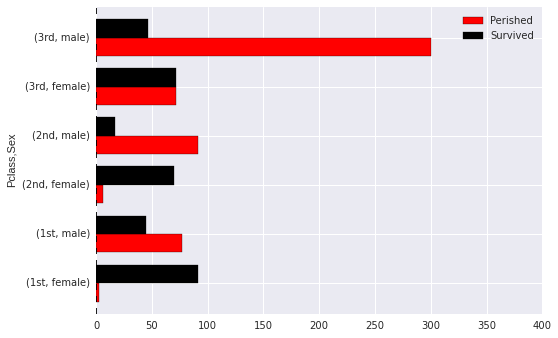

In [171]:
surv_counts.plot(kind='barh',width=0.75,color=['red','black'],
                     xlim=(0,400))


In [164]:
surv_counts

Perished  Survived
Pclass Sex                       
1st    female         3        91
       male          77        45
2nd    female         6        70
       male          91        17
3rd    female        72        72
       male         300        47

In [173]:
survival_counts=pd.crosstab([train_df.Pclass,train_df.Sex],train_df.Survived.astype(bool))
survival_counts

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

In [176]:
survival_counts.index.set_levels([['1st', '2nd', '3rd'], ['female', 'male']])

MultiIndex(levels=[[u'1st', u'2nd', u'3rd'], [u'female', u'male']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=[u'Pclass', u'Sex'])

In [183]:
survival_counts.index=survival_counts.index.set_levels([['1st', '2nd', '3rd'], ['Women', 'Men']])

In [184]:
survival_counts.columns=['Perished','Survived']

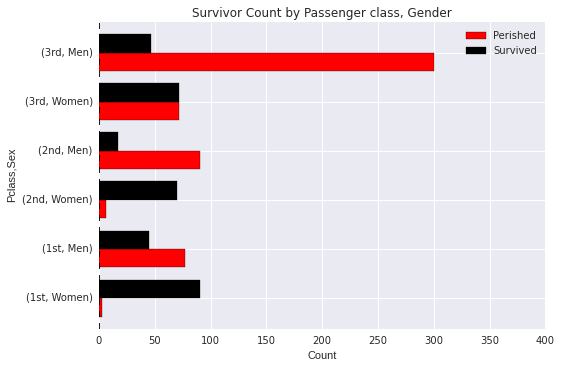

In [185]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Count')
ax.set_title('Survivor Count by Passenger class, Gender')
survival_counts.plot(kind='barh',ax=ax,width=0.75,color=['red','black'],
                     xlim=(0,400))

In [189]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [ ]:
train_df['Age_bracket']=

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression(normalize=True)

In [5]:
print model.normalize

True


In [6]:
print model

LinearRegression(copy_X=True, fit_intercept=True, normalize=True)


In [9]:
x = np.array([0,1,2])
y = np.array([0,1,2])

In [10]:
X = x[:,np.newaxis]
X

array([[0],
       [1],
       [2]])

In [11]:
model.fit(X,y)
model.coef_

array([ 1.])

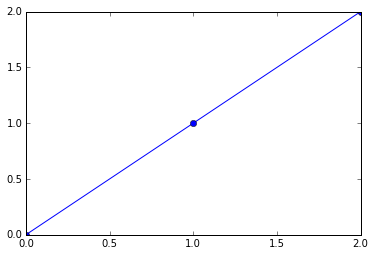

In [13]:
plt.plot(x,y,marker='o');

In [16]:
x = np.array([0,1,2,3,4,5])
y = np.array([0,3,6,9,12,15])

In [42]:
X = x[:,np.newaxis]
X

array([[  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.]])

In [18]:
model.fit(X,y)
model.coef_

array([ 3.])

In [19]:
x = np.array([0,1,2,3,4,5])
y = np.array([0,3.14,5.67,9.12,11.89,15.13])

In [20]:
model.fit(X,y)
model.coef_

array([ 3.01])

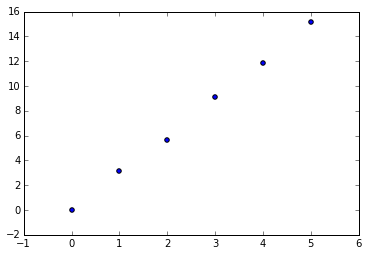

In [22]:
plt.scatter(x,y,marker='o');

In [ ]:
x = arange(0,10)
y=x + 

In [23]:
N=1024


In [24]:
np.eye(8,8)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [31]:
import random
N=11
x=np.linspace(0,10,N)
noise=np.random.normal(0,0.3,N)
noise

array([-0.4307876 ,  0.02636329, -0.4436544 , -0.01880463,  0.14310088,
       -0.4676968 , -0.17451262, -0.39333021,  0.06042679,  0.20506658,
        0.46586331])

In [38]:
y=5*x+noise
print x;
print y;

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ -0.4307876    5.02636329   9.5563456   14.98119537  20.14310088
  24.5323032   29.82548738  34.60666979  40.06042679  45.20506658
  50.46586331]


In [40]:
type(y)

numpy.ndarray

In [43]:
model.fit(X,y)
model.coef_

array([ 5.05130588])

In [51]:
sample_size=500
x = []
y = []

for i in range(sample_size):
    newVal = random.normalvariate(100,10)
    x.append(newVal)
    y.append(newVal / 2.0 + random.normalvariate(50,5))


In [48]:
type(x)


list

In [67]:
X = np.array(x)[:,np.newaxis]
X.shape

(500, 1)

In [71]:
model.fit(X,y)
print "coeff=%s, intercept=%s" % (model.coef_,model.intercept_)

coeff=[ 0.47071289], intercept=52.7456611783


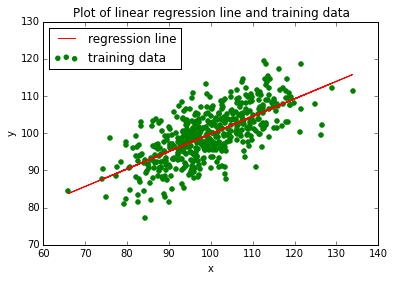

In [78]:
plt.title("Plot of linear regression line and training data")
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,y,marker='o', color='green', label='training data');
plt.plot(X,model.predict(X), color='red', label='regression line')
plt.legend(loc=2)


In [5]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from patsy import dmatrices,dmatrix

In [83]:
y, X = dmatrices('Survived ~ C(Pclass) + C(Sex) + Fare', 
                 train_df,return_type='dataframe')

In [266]:
y1, X1 = dmatrices('Survived ~ C(Pclass) + C(Sex)', 
                 train_df,return_type='dataframe')
y=y1
X=X1


In [267]:
print X.columns

Index([u'Intercept', u'C(Pclass)[T.2]', u'C(Pclass)[T.3]', u'C(Sex)[T.male]'], dtype='object')


In [86]:
X.head().T

,0,1,2,3,4
Intercept,1.00,1.0000,1.000,1.0,1.00
C(Pclass)[T.2],0.00,0.0000,0.000,0.0,0.00
C(Pclass)[T.3],1.00,0.0000,1.000,0.0,1.00
C(Sex)[T.male],1.00,0.0000,0.000,0.0,1.00
Fare,7.25,71.2833,7.925,53.1,8.05


In [87]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [269]:
y=np.ravel(y)

In [270]:
model=LogisticRegression()
lr_model=model.fit(X,y)

In [271]:
lr_model.score(X,y)

0.78675645342312006

In [272]:
lr_model.coef_

array([[ 1.05159231, -0.70344928, -1.74672027, -2.51123608]])

In [273]:
lr_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [274]:
y.mean()

0.38383838383838381

In [98]:
zip(X.columns,np.transpose(lr_model.coef_))

[('Intercept', array([ 0.94147982])),
 ('C(Pclass)[T.2]', array([-0.55935743])),
 ('C(Pclass)[T.3]', array([-1.581078])),
 ('C(Sex)[T.male]', array([-2.48905782])),
 ('Fare', array([ 0.002836]))]

In [99]:
pd.DataFrame(zip(X.columns,np.transpose(lr_model.coef_)))

,0,1
0,Intercept,[0.941479819264]
1,C(Pclass)[T.2],[-0.559357426112]
2,C(Pclass)[T.3],[-1.58107800326]
3,C(Sex)[T.male],[-2.4890578171]
4,Fare,[0.00283600458878]


In [101]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)


In [103]:
X_train.shape

(623, 5)

In [104]:
X_test.shape

(268, 5)

In [105]:
X.shape

(891, 5)

In [107]:
lr_model2=LogisticRegression()
lr_model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [109]:
predicted=lr_model2.predict(X_test)
print predicted

[ 0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  0.
  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.
  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.
  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1

In [111]:
probs = lr_model2.predict_proba(X_test)
print probs

[[ 0.8866865   0.1133135 ]
 [ 0.88827738  0.11172262]
 [ 0.88324338  0.11675662]
 [ 0.10513151  0.89486849]
 [ 0.40825737  0.59174263]
 [ 0.6347827   0.3652173 ]
 [ 0.10363492  0.89636508]
 [ 0.10121713  0.89878287]
 [ 0.60182718  0.39817282]
 [ 0.41273114  0.58726886]
 [ 0.88820774  0.11179226]
 [ 0.19694522  0.80305478]
 [ 0.8882316   0.1117684 ]
 [ 0.19215714  0.80784286]
 [ 0.11969307  0.88030693]
 [ 0.41238182  0.58761818]
 [ 0.88789345  0.11210655]
 [ 0.72440579  0.27559421]
 [ 0.8881629   0.1118371 ]
 [ 0.88805594  0.11194406]
 [ 0.73587796  0.26412204]
 [ 0.10404535  0.89595465]
 [ 0.88823446  0.11176554]
 [ 0.63451534  0.36548466]
 [ 0.41127392  0.58872608]
 [ 0.10776826  0.89223174]
 [ 0.88819821  0.11180179]
 [ 0.41244005  0.58755995]
 [ 0.19224666  0.80775334]
 [ 0.40122662  0.59877338]
 [ 0.88802251  0.11197749]
 [ 0.19785867  0.80214133]
 [ 0.88783031  0.11216969]
 [ 0.63210533  0.36789467]
 [ 0.88839272  0.11160728]
 [ 0.6347827   0.3652173 ]
 [ 0.88852888  0.11147112]
 

In [112]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.787313432836
0.849553571429


In [113]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[140  28]
 [ 29  71]]
             precision    recall  f1-score   support

        0.0       0.83      0.83      0.83       168
        1.0       0.72      0.71      0.71       100

avg / total       0.79      0.79      0.79       268



In [114]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.8         0.7752809   0.75280899  0.78651685  0.71910112  0.78651685
  0.76404494  0.78651685  0.84269663  0.83146067]
0.784494382022


In [115]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
type(X_test)

numpy.ndarray

In [118]:
type(X)

pandas.core.frame.DataFrame

In [119]:
X.head()

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],Fare
0,1,0,1,1,7.2500
1,1,0,0,0,71.2833
2,1,0,1,0,7.9250
3,1,0,0,0,53.1000
4,1,0,1,1,8.0500


In [121]:
X_test[:5]

array([[   1.    ,    0.    ,    1.    ,    1.    ,   14.4583],
       [   1.    ,    0.    ,    1.    ,    1.    ,    7.55  ],
       [   1.    ,    0.    ,    1.    ,    1.    ,   29.125 ],
       [   1.    ,    0.    ,    0.    ,    0.    ,  146.5208],
       [   1.    ,    0.    ,    1.    ,    0.    ,   15.2458]])

In [275]:
predicted=lr_model2.predict(X_test)

418

In [234]:
null_fare_passenger=test_df[test_df['Fare'].isnull()]
idx=null_fare_passenger.index[0]

similar_passengers=test_df[(test_df['Sex']==null_fare_passenger['Sex'][idx]) & 
              (test_df['Pclass']==null_fare_passenger['Pclass'][idx])]
mean_fare=np.mean(similar_passengers['Fare'])
mean_fare
null_fare_passenger['Fare']
null_fare_passenger['Fare']=mean_fare
null_fare_passenger['Fare']

-c:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


152    11.82635
Name: Fare, dtype: float64

In [309]:
null_fare_passenger=test_df[test_df['Fare'].isnull()]
idx=null_fare_passenger.index[0]
idx

152

In [235]:
null_fare_passenger

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,11.82635,NaN,S


In [236]:
test_df[test_df['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [238]:
test_df.loc[idx,'Fare']=mean_fare

In [239]:
test_df[test_df['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,11.82635,NaN,S


In [240]:
test_df.loc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                     11.82635
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [241]:
test_X = dmatrix('C(Pclass) + C(Sex) + Fare',test_df)
len(test_X)

418

In [276]:
test_X1 = dmatrix('C(Pclass) + C(Sex)',test_df)
len(test_X1)
test_X=test_X1
len(test_X)

418

In [277]:
len(test_df)

418

In [185]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.23
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.23
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.23
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.23
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.23
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1.23
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.23
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1.23
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1.23
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1.23


In [242]:
test_X

DesignMatrix with shape (418, 5)
  Intercept  C(Pclass)[T.2]  C(Pclass)[T.3]  C(Sex)[T.male]      Fare
          1               0               1               1    7.8292
          1               0               1               0    7.0000
          1               1               0               1    9.6875
          1               0               1               1    8.6625
          1               0               1               0   12.2875
          1               0               1               1    9.2250
          1               0               1               0    7.6292
          1               1               0               1   29.0000
          1               0               1               0    7.2292
          1               0               1               1   24.1500
          1               0               1               1    7.8958
          1               0               0               1   26.0000
          1               0               0              

In [278]:
predicted=lr_model.predict(test_X)

In [279]:
predicted.shape

(418,)

In [245]:
predicted[:10]

array([ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.])

In [246]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
type(test_df['PassengerId'])

pandas.core.series.Series

In [133]:
type(predicted)

numpy.ndarray

In [280]:
pred_results=pd.Series(predicted,name='Survived')

In [281]:
pred_results.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: float64

In [282]:
len(test_df['PassengerId'])

418

In [251]:
len(pred_results)

418

In [283]:

pred_results.head()
lr_results=pd.concat([test_df['PassengerId'],pred_results],axis=1)


In [284]:
lr_results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [285]:
lr_results.Survived=lr_results.Survived.astype(int)

In [286]:
lr_results.to_csv('csv/logisticregr_results_npfare.csv',index=False)

In [316]:
null_fare_passengers_test=test_df_filled[test_df_filled['Fare'].isnull()]
null_fare_passengers_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [296]:
null_age_passengers_test=test_df[test_df['Age'].isnull()]
null_age_passengers_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


In [290]:
null_age_passengers_train=train_df[train_df['Age'].isnull()]
null_age_passengers_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [291]:
null_sibsp_passengers_test=test_df[test_df['SibSp'].isnull()]
null_sibsp_passengers_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [292]:
null_sibsp_passengers_train=train_df[train_df['SibSp'].isnull()]
null_sibsp_passengers_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [293]:
null_emb_passengers_test=test_df[test_df['Embarked'].isnull()]
null_emb_passengers_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [294]:
null_emb_passengers_train=train_df[train_df['Embarked'].isnull()]
null_emb_passengers_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


In [295]:
null_parch_passengers_test=test_df[test_df['Parch'].isnull()]
null_parch_passengers_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [297]:
missing_perc_in_test=test_df.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x)))).order(ascending=False)
missing_perc_in_test

Cabin          78.229665
Age            20.574163
Embarked        0.000000
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64

In [315]:
test_df_filled=test_df

In [299]:
null_age_passengers_test=test_df_filled[test_df_filled['Age'].isnull()]
null_age_passengers_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


In [301]:
null_age_passengers_test['PassengerId'].tolist()

[902,
 914,
 921,
 925,
 928,
 931,
 933,
 939,
 946,
 950,
 957,
 968,
 975,
 976,
 977,
 980,
 983,
 985,
 994,
 999,
 1000,
 1003,
 1008,
 1013,
 1016,
 1019,
 1024,
 1025,
 1038,
 1040,
 1043,
 1052,
 1055,
 1060,
 1062,
 1065,
 1075,
 1080,
 1083,
 1091,
 1092,
 1097,
 1103,
 1108,
 1111,
 1117,
 1119,
 1125,
 1135,
 1136,
 1141,
 1147,
 1148,
 1157,
 1158,
 1159,
 1160,
 1163,
 1165,
 1166,
 1174,
 1178,
 1180,
 1181,
 1182,
 1184,
 1189,
 1193,
 1196,
 1204,
 1224,
 1231,
 1234,
 1236,
 1249,
 1250,
 1257,
 1258,
 1272,
 1274,
 1276,
 1300,
 1302,
 1305,
 1308,
 1309]

In [302]:
len(null_age_passengers_test['PassengerId'])

86

In [306]:
len(null_age_passengers_test['PassengerId'])*1.0/len(test_df)

0.20574162679425836

In [317]:
null_fare_passengers_test=test_df_filled[test_df_filled['Fare'].isnull()]
passenger_id_list=null_fare_passengers_test['PassengerId'].tolist()
for pass_id in passenger_id_list:
    idx=test_df[test_df['PassengerId']==pass_id].index[0]
    print idx
    similar_passengers=test_df[(test_df['Sex']==null_fare_passengers_test['Sex'][idx]) & \
              (test_df['Pclass']==null_fare_passengers_test['Pclass'][idx])]
    mean_val=np.mean(similar_passengers['Fare'])
    test_df_filled.loc[idx,'Fare']=mean_fare

152


In [320]:
test_df_filled.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                     11.82635
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [321]:
test_df_filled[test_df_filled['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,11.82635,NaN,S


In [340]:
def fill_null_vals(df,col_name):
    null_passengers=df[df[col_name].isnull()]
    passenger_id_list=null_passengers['PassengerId'].tolist()
    df_filled=df.copy()
    for pass_id in passenger_id_list:
        idx=df[df['PassengerId']==pass_id].index[0]
        #print idx
        similar_passengers=df[(df['Sex']==null_passengers['Sex'][idx]) & (df['Pclass']==null_passengers['Pclass'][idx])]
        #print similar_passengers
        mean_val=np.mean(similar_passengers[col_name].dropna())
        print mean_val
        df_filled.loc[idx,col_name]=mean_val
        print "col_name=%s" % col_name
    return df_filled

In [341]:
test_df_filled=fill_null_vals(test_df,'Age')

24.5251041667
col_name=Age
41.3333333333
col_name=Age
24.5251041667
col_name=Age
23.0734
col_name=Age
23.0734
col_name=Age
24.5251041667
col_name=Age
40.52
col_name=Age
24.5251041667
col_name=Age
30.9406779661
col_name=Age
24.5251041667
col_name=Age
24.3765517241
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
30.9406779661
col_name=Age
24.5251041667
col_name=Age
23.0734
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
23.0734
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
23.0734
col_name=Age
23.0734
col_name=Age
24.5251041667
col_name=Age
40.52
col_name=Age
40.52
col_name=Age
24.5251041667
col_name=Age
23.0734
col_name=Age
24.5251041667
col_name=Age
41.3333333333
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
24.5251041667
col_name=Age
23.0734
col_name=Age
40.52
col_name=Age
23.0734
col_name=Age
23.073

In [342]:
test_df_filled.loc[188]

PassengerId               1080
Pclass                       3
Name           Sage, Miss. Ada
Sex                     female
Age                    23.0734
SibSp                        8
Parch                        2
Ticket                CA. 2343
Fare                     69.55
Cabin                      NaN
Embarked                     S
Name: 188, dtype: object

In [343]:
test_df_filled[test_df_filled['Age'].isnull()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [344]:
test_df_filled[test_df_filled['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


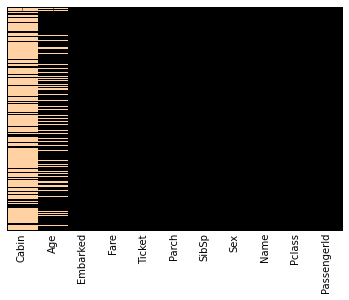

In [347]:
col_map={True: '#ffd1a3', False: 'k'}
x=missmap(test_df, colors=col_map)

In [348]:
test_df['Age'].count().sum()

332

In [349]:
len(test_df)

418

In [352]:
test_df['Age'].count().sum()/(1.0*len(test_df))

0.79425837320574166

In [354]:
train_df['Age'].count().sum()/(1.0*len(train_df))

0.80134680134680136

In [22]:
formula1 = 'C(Pclass) + C(Sex) + Fare'
formula2 = 'C(Pclass) + C(Sex)'
formula3 = 'C(Sex)'
formula4 = 'C(Pclass) + C(Sex) + Age + SibSp + Parch'
formula5 = 'C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)' # All
formula6 = 'C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)'
formula7 = 'C(Pclass) + C(Sex) + SibSp + Parch + C(Embarked)'
formula8 = 'C(Pclass) + C(Sex) + SibSp + Parch + C(Embarked)'

In [23]:
formula_map = {'PClass_Sex_Fare' : formula1,
	       'PClass_Sex' : formula2,
	       'Sex' : formula3,
	       'PClass_Sex_Age_Sibsp_Parch' : formula4,
	       'PClass_Sex_Age_Sibsp_Parch_Embarked' : formula5,
           'PClass_Sex_Embarked' : formula6,
           'PClass_Sex_Age_Parch_Embarked' : formula7,
           'PClass_Sex_SibSp_Parch_Embarked' : formula8
              }

In [24]:
def fill_null_vals(df,col_name):
    null_passengers=df[df[col_name].isnull()]
    passenger_id_list=null_passengers['PassengerId'].tolist()
    df_filled=df.copy()
    for pass_id in passenger_id_list:
        idx=df[df['PassengerId']==pass_id].index[0]
        similar_passengers=df[(df['Sex']==null_passengers['Sex'][idx]) & (df['Pclass']==null_passengers['Pclass'][idx])]
        mean_val=np.mean(similar_passengers[col_name].dropna())
        df_filled.loc[idx,col_name]=mean_val
    return df_filled

In [7]:
def fill_null_vals(df,col_name):
    null_passengers=df[df[col_name].isnull()]
    passenger_id_list=null_passengers['PassengerId'].tolist()
    df_filled=df.copy()
    for pass_id in passenger_id_list:
        idx=df[df['PassengerId']==pass_id].index[0]
        similar_passengers=df[(df['Sex']==null_passengers['Sex'][idx]) & (df['Pclass']==null_passengers['Pclass'][idx])]
        mean_val=np.mean(similar_passengers[col_name].dropna())
        df_filled.loc[idx,col_name]=mean_val
    return df_filled


In [9]:
train_df_filled=fill_null_vals(train_df,'Fare')
train_df_filled=fill_null_vals(train_df_filled,'Age')
test_df_filled=fill_null_vals(test_df,'Fare')
test_df_filled=fill_null_vals(test_df_filled,'Age')


In [10]:
y_train,X_train = dmatrices('Survived ~ ' + formula5, 
                            train_df_filled,return_type='dataframe')
y_train = np.ravel(y_train)

In [13]:
from sklearn import svm

In [12]:
kernel_types=['linear','rbf','poly']
kernel_types=['poly']

In [13]:

for kernel in kernel_types:
    y_train,X_train = dmatrices('Survived ~ ' + formula5, 
                            train_df_filled,return_type='dataframe')
    y_train = np.ravel(y_train)
    clf=svm.SVC(kernel=kernel,gamma=3)
    clf.fit(X_train,y_train)
    X_test=dmatrix(formula5,test_df_filled)
    predicted=clf.predict(X_test)
    print "kernel=%s" %kernel, predicted[:5]
    results_file='csv/svm_%s_%s.csv' % (formula5,kernel)
    pred_results=pd.Series(predicted,name='Survived')
    lr_results=pd.concat([test_df['PassengerId'],pred_results],axis=1)
    lr_results.Survived=lr_results.Survived.astype(int)
    lr_results.to_csv(results_file,index=False)

    
    

kernel=poly [ 0.  1.  0.  0.  0.]


In [10]:
y_train,X_train = dmatrices('Survived ~ ' + formula5, 
                            train_df_filled,return_type='dataframe')
y_train = np.ravel(y_train)

In [11]:
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.82022472  0.7752809   0.79775281  0.80898876  0.76404494  0.85393258
  0.82022472  0.83146067  0.78651685  0.80681818]
0.806524514811


In [14]:
kernel='rbf'
scores = cross_val_score(svm.SVC(kernel=kernel), X_train, y_train, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.84269663  0.80898876  0.82022472  0.76404494  0.76404494  0.8988764
  0.76404494  0.80898876  0.84269663  0.81818182]
0.813278855975


In [ ]:
kernel='poly'
scores = cross_val_score(svm.SVC(kernel=kernel), X_train, y_train, scoring='accuracy', cv=10)
print scores
print scores.mean()

In [12]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt_clf = dt_clf.fit(X_train,y_train)

In [15]:
X_test=dmatrix(formula5,test_df_filled)
predicted=dt_clf.predict(X_test)

In [17]:
predicted[:20]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.])

In [28]:
train_df_filled=fill_null_vals(train_df,'Fare')
train_df_filled=fill_null_vals(train_df_filled,'Age')
assert len(train_df_filled)==len(train_df)
    
test_df_filled=fill_null_vals(test_df,'Fare')
test_df_filled=fill_null_vals(test_df_filled,'Age')
assert len(test_df_filled)==len(test_df)

from sklearn import metrics,svm, tree

for formula_name, formula in formula_map.iteritems():

        print "name=%s formula=%s" % (formula_name,formula)

        y_train,X_train = pt.dmatrices('Survived ~ ' + formula, 
                                    train_df_filled,return_type='dataframe')

        y_train = np.ravel(y_train)
        model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
        print "About to fit..."
        dt_model = model.fit(X_train, y_train)
        print "Training score:%s" % dt_model.score(X_train,y_train)
        X_test=pt.dmatrix(formula,test_df_filled)
        predicted=dt_model.predict(X_test)
        print "predicted:%s" % predicted[:5]
        assert len(predicted)==len(test_df)
        pred_results=pd.Series(predicted,name='Survived')
        dt_results=pd.concat([test_df['PassengerId'],pred_results],axis=1)
        dt_results.Survived=dt_results.Survived.astype(int)
        results_file='csv/dt_%s_1.csv' % (formula_name)
        print "output file: %s\n" % results_file
        dt_results.to_csv(results_file,index=False)
    

name=PClass_Sex_Age_Sibsp_Parch formula=C(Pclass) + C(Sex) + Age + SibSp + Parch
About to fit...
Training score:0.819304152637
predicted:[ 0.  0.  0.  0.  1.]
output file: csv/dt_PClass_Sex_Age_Sibsp_Parch_1.csv

name=PClass_Sex_Fare formula=C(Pclass) + C(Sex) + Fare
About to fit...
Training score:0.814814814815
predicted:[ 0.  1.  0.  0.  1.]
output file: csv/dt_PClass_Sex_Fare_1.csv

name=PClass_Sex_Embarked formula=C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)
About to fit...
Training score:0.832395950506
predicted:[ 0.  0.  0.  0.  0.]
output file: csv/dt_PClass_Sex_Embarked_1.csv

name=PClass_Sex_SibSp_Parch_Embarked formula=C(Pclass) + C(Sex) + SibSp + Parch + C(Embarked)
About to fit...
Training score:0.811023622047
predicted:[ 0.  0.  0.  0.  0.]
output file: csv/dt_PClass_Sex_SibSp_Parch_Embarked_1.csv

name=PClass_Sex formula=C(Pclass) + C(Sex)
About to fit...
Training score:0.786756453423
predicted:[ 0.  0.  0.  0.  0.]
output file: csv/dt_PClass_Sex_1.csv

name=PClass_Sex_